### Setup ###

In [246]:
import pandas as pd
from sklearn.feature_selection import mutual_info_regression
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from pathlib import Path

# Set Matplotlib defaults
plt.rc("figure", autolayout=True)
plt.rc(
    "axes",
    labelweight="bold",
    labelsize="large",
    titleweight="bold",
    titlesize=14,
    titlepad=10,
)


def make_mi_scores(X: pd.DataFrame, y: pd.Series) -> pd.Series:
    X = X.copy()
    for colname in X.select_dtypes(["object", "category"]):
        X[colname], _ = X[colname].factorize()
    # All discrete features should now have integer dtypes
    discrete_features = [pd.api.types.is_integer_dtype(t) for t in X.dtypes]
    mi_scores = mutual_info_regression(
        X, y, discrete_features=discrete_features, random_state=0)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores


def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


### Load data ###

In [247]:
data_dir = Path("../input/house-prices-advanced-regression-techniques/")

X = pd.read_csv("data/X_research.csv", index_col="Id")
y = pd.read_csv("data/y_research.csv", index_col="Id")
df_train = pd.read_csv(data_dir / "train.csv", index_col="Id")
df_test = pd.read_csv(data_dir / "test.csv", index_col="Id")

numerical_data: list[str] = ['BedroomAbvGr', 'BsmtFinSF1', 'BsmtFinSF2',
                             'BsmtFullBath', 'BsmtHalfBath', 'BsmtUnfSF', 'EnclosedPorch',
                             'Fireplaces', 'FirstFlrSF', 'FullBath', 'GarageArea',
                             'GarageCars', 'GarageYrBlt', 'GrLivArea', 'HalfBath', 'KitchenAbvGr',
                             'LotArea', 'LotFrontage', 'LowQualFinSF', 'MasVnrArea',
                             'MiscVal', 'MoSold', 'OpenPorchSF', 'PoolArea', 'ScreenPorch',
                             'SecondFlrSF', 'Threeseasonporch', 'TotRmsAbvGrd', 'TotalBsmtSF',
                             'WoodDeckSF', 'YearBuilt', 'YearRemodAdd', 'YrSold']


## Feature reserch ##

### Vars with NA ###

In [248]:
print(len(df_test))
df_na = df_test.isna().sum().sort_values(ascending=False)
df_na.loc[df_na > 0]

1459


PoolQC          1456
MiscFeature     1408
Alley           1352
Fence           1169
FireplaceQu      730
LotFrontage      227
GarageYrBlt       78
GarageFinish      78
GarageQual        78
GarageCond        78
GarageType        76
BsmtCond          45
BsmtExposure      44
BsmtQual          44
BsmtFinType2      42
BsmtFinType1      42
MasVnrType        16
MasVnrArea        15
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
SaleType           1
BsmtFinSF1         1
GarageCars         1
BsmtUnfSF          1
TotalBsmtSF        1
Exterior2nd        1
Exterior1st        1
GarageArea         1
BsmtFinSF2         1
dtype: int64

### Utilities ###

In [249]:
df_test.Utilities.describe()

count       1457
unique         1
top       AllPub
freq        1457
Name: Utilities, dtype: object

### Condition2 ###

In [250]:
df_test.Condition2.unique()

array(['Norm', 'Feedr', 'PosA', 'PosN', 'Artery'], dtype=object)

### PoolQC and  PoolArea ###

In [251]:
print((df_train.PoolArea == 0).sum())
print()
print(df_train.PoolArea.describe())
print()
print(df_train.PoolQC.describe())

1453

count    1460.000000
mean        2.758904
std        40.177307
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       738.000000
Name: PoolArea, dtype: float64

count      7
unique     3
top       Gd
freq       3
Name: PoolQC, dtype: object


In [252]:
PoolQC = X[['PoolQC']]
PoolQC.name = "IsPoolExist"
PoolQC.notna()
X['IsPoolExist'] = PoolQC.notna()

### OverallQual ###

In [253]:
X.OverallQual.describe()

count    1456.000000
mean        5.098901
std         1.384191
min         0.000000
25%         4.000000
50%         5.000000
75%         6.000000
max         9.000000
Name: OverallQual, dtype: float64

In [254]:
# X['SalePrice'] = y['SalePrice']
# sns.scatterplot(x="OverallQual", y="SalePrice", data=X,)

In [255]:
# sns.displot(X, x="OverallQual", kind="kde",)

### Useless vars ###

In [256]:
mi = make_mi_scores(X, y['SalePrice'])
mi.loc[mi == 0].sort_values()

LowQualFinSF        0.0
Utilities           0.0
Functional          0.0
MoSold              0.0
Threeseasonporch    0.0
YrSold              0.0
BsmtFinSF2          0.0
PoolArea            0.0
Name: MI Scores, dtype: float64

### Usefull vars ###

In [257]:
usefull_mi = mi.loc[mi > 0].sort_values(ascending=False)
usefull_mi

0.010625109589885273

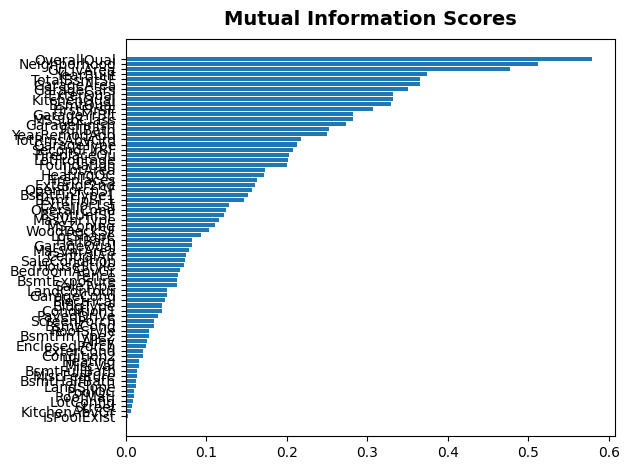

In [258]:
plot_mi_scores(usefull_mi)